Evaluacion 1: Incidente "Odisea Cósmica" - Protocolo de Rescate Predictivo

Maruca Cantu Valdes A00834245 | 
Santiago Torres Hernandez A00830563

# Paso 1: Análisis Exploratorio de Datos (EDA)

Analisis Exploratorio de Datos

In [45]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración: mostrar todas las columnas en los DataFrames
pd.set_option('display.max_columns', None)


## 1.1 Carga y Exploración Inicial de Datos


In [46]:
# Cargar el dataset
df = pd.read_csv('registros_entrenamiento-2.csv')

print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas\n")
display(df.head())
print(f"\nTipos de datos:")
print(df.dtypes)


Dimensiones: 8000 filas x 14 columnas



,IdPasajero,PlanetaOrigen,SuenoCriogenico,Cabina,Destino,Edad,ServicioVIP,ServicioHabitacion,Cafeteria,CentroComercial,Spa,CubiertaVR,Transportado,Iniciales
0,004D8BSQ,NaN,False,C/268/S,TRAPPIST-1e,27.0,False,0.0,63.0,8.0,129.0,2960.0,False,YUW
1,009TL1XF,Europa,False,C/258/P,55 Cancri e,18.0,False,0.0,3492.0,0.0,506.0,8.0,True,SFW
2,00A9QC49,Europa,False,A/30/S,TRAPPIST-1e,44.0,True,1409.0,910.0,17.0,1452.0,3782.0,False,POY
3,00BJM5YI,Earth,False,E/24/P,TRAPPIST-1e,48.0,False,0.0,111.0,0.0,1508.0,0.0,False,ZIT
4,00DQRZAR,Mars,False,F/1550/P,TRAPPIST-1e,68.0,True,523.0,0.0,859.0,201.0,782.0,False,TJJ



Tipos de datos:
IdPasajero             object
PlanetaOrigen          object
SuenoCriogenico        object
Cabina                 object
Destino                object
Edad                  float64
ServicioVIP            object
ServicioHabitacion    float64
Cafeteria             float64
CentroComercial       float64
Spa                   float64
CubiertaVR            float64
Transportado             bool
Iniciales              object
dtype: object


Columnas con valores faltantes:


,Columna,Faltantes,Porcentaje
SuenoCriogenico,SuenoCriogenico,197,2.46
CentroComercial,CentroComercial,191,2.39
ServicioVIP,ServicioVIP,188,2.35
Cabina,Cabina,179,2.24
PlanetaOrigen,PlanetaOrigen,177,2.21
CubiertaVR,CubiertaVR,174,2.17
Spa,Spa,173,2.16
Edad,Edad,165,2.06
Destino,Destino,163,2.04
ServicioHabitacion,ServicioHabitacion,161,2.01


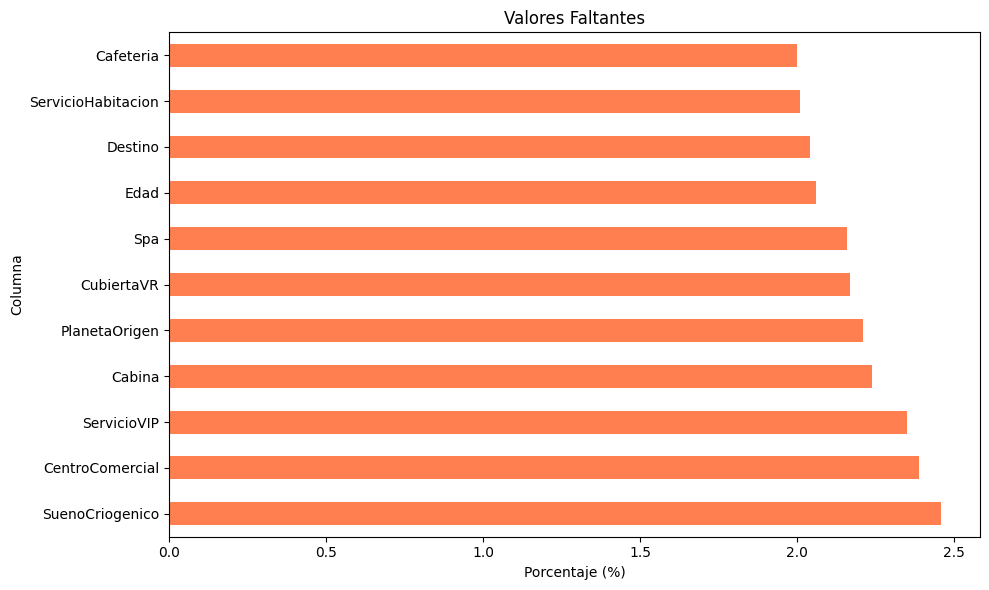

In [47]:
# Valores faltantes
missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Faltantes': df.isnull().sum(),
    'Porcentaje': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Faltantes'] > 0].sort_values('Faltantes', ascending=False)

if len(missing_data) > 0:
    print("Columnas con valores faltantes:")
    display(missing_data)
    
    plt.figure(figsize=(10, 6))
    missing_data.set_index('Columna')['Porcentaje'].plot(kind='barh', color='coral')
    plt.xlabel('Porcentaje (%)')
    plt.title('Valores Faltantes')
    plt.tight_layout()
    plt.show()


In [48]:
# Estadísticas descriptivas
display(df.describe())
display(df.describe(include=['object', 'bool']))


,Edad,ServicioHabitacion,Cafeteria,CentroComercial,Spa,CubiertaVR
count,7835.000000,7839.000000,7840.000000,7809.000000,7827.000000,7826.000000
mean,28.898532,223.319301,461.104592,171.726085,320.425067,308.133785
std,14.539789,664.351288,1620.003645,597.058475,1159.805503,1152.419633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,82.000000,26.000000,66.000000,48.750000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


,IdPasajero,PlanetaOrigen,SuenoCriogenico,Cabina,Destino,ServicioVIP,Transportado,Iniciales
count,8000,7823,7803,7821,7837,7812,8000,8000
unique,8000,3,2,6124,3,2,2,6436
top,ZXEAJ2I3,Earth,False,G/109/P,TRAPPIST-1e,False,True,IET
freq,1,4246,5020,7,5441,7633,4013,5


## 1.2 Análisis de la Variable Objetivo: Transportado


Transportado
True     4013
False    3987
Name: count, dtype: int64

Balance: 0.99


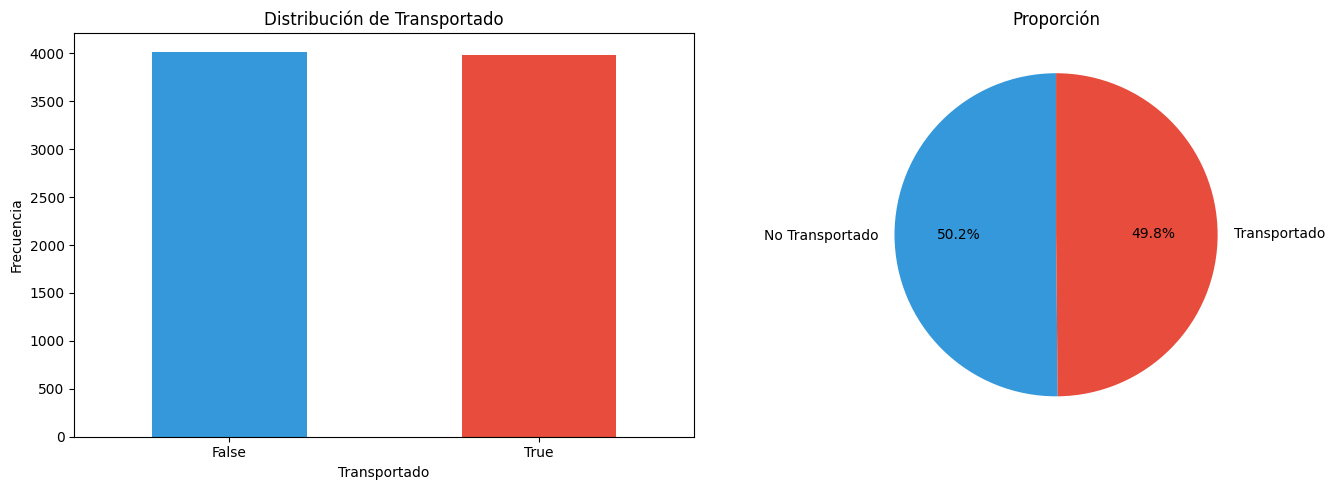

In [49]:
# Variable objetivo
target_counts = df['Transportado'].value_counts()
print(target_counts)
print(f"\nBalance: {target_counts.min() / target_counts.max():.2f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

target_counts.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Distribución de Transportado')
axes[0].set_xlabel('Transportado')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticklabels(['False', 'True'], rotation=0)

axes[1].pie(target_counts, labels=['No Transportado', 'Transportado'], autopct='%1.1f%%', 
            colors=['#3498db', '#e74c3c'], startangle=90)
axes[1].set_title('Proporción')

plt.tight_layout()
plt.show()


## 1.3 Distribución de Variables Numéricas


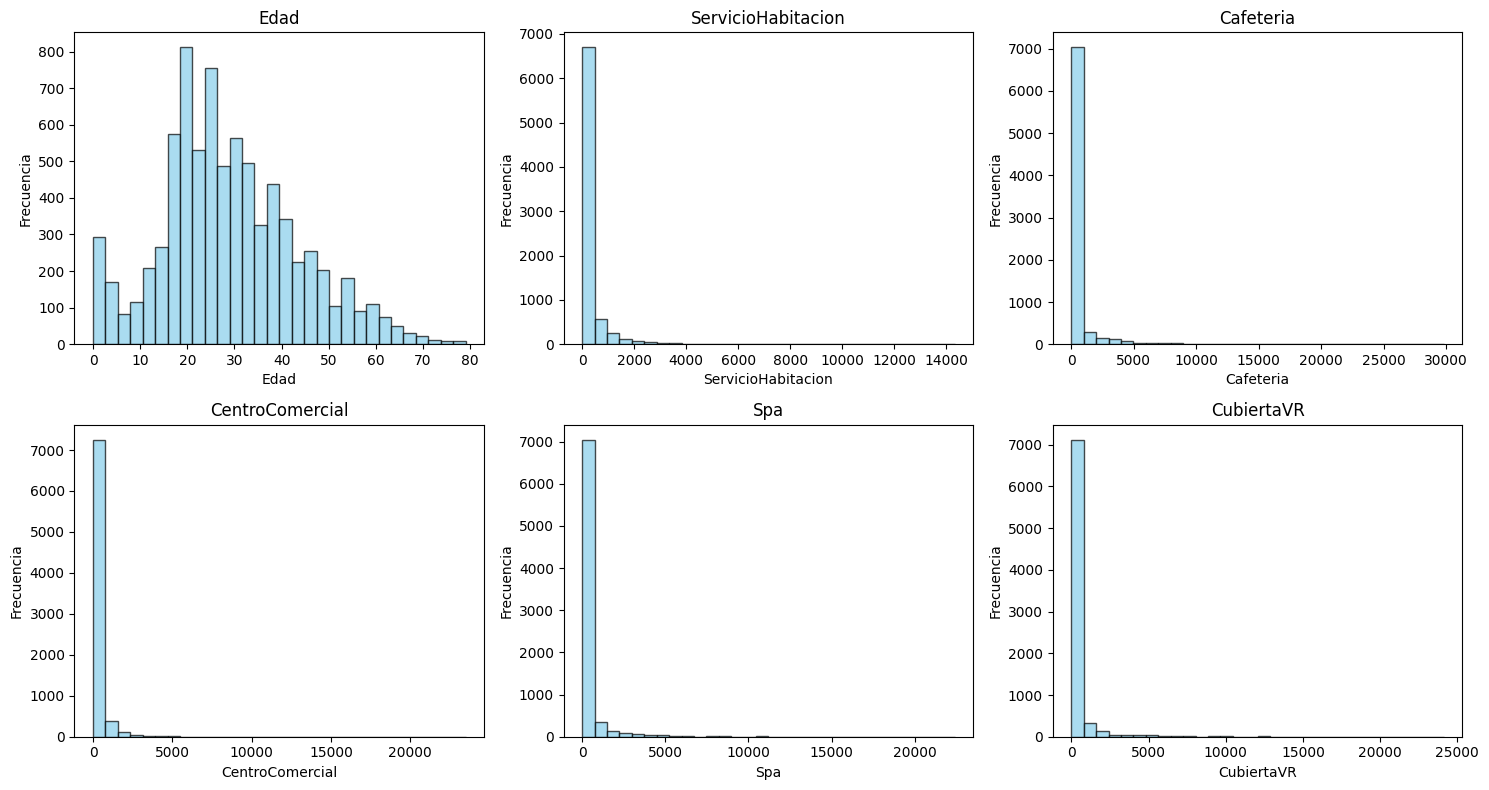

In [50]:
# Variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'IdPasajero' in df.columns:
    numeric_cols = [col for col in numeric_cols if col != 'IdPasajero']

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if len(numeric_cols) > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')

for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


## 1.4 Distribución de Variables Categóricas


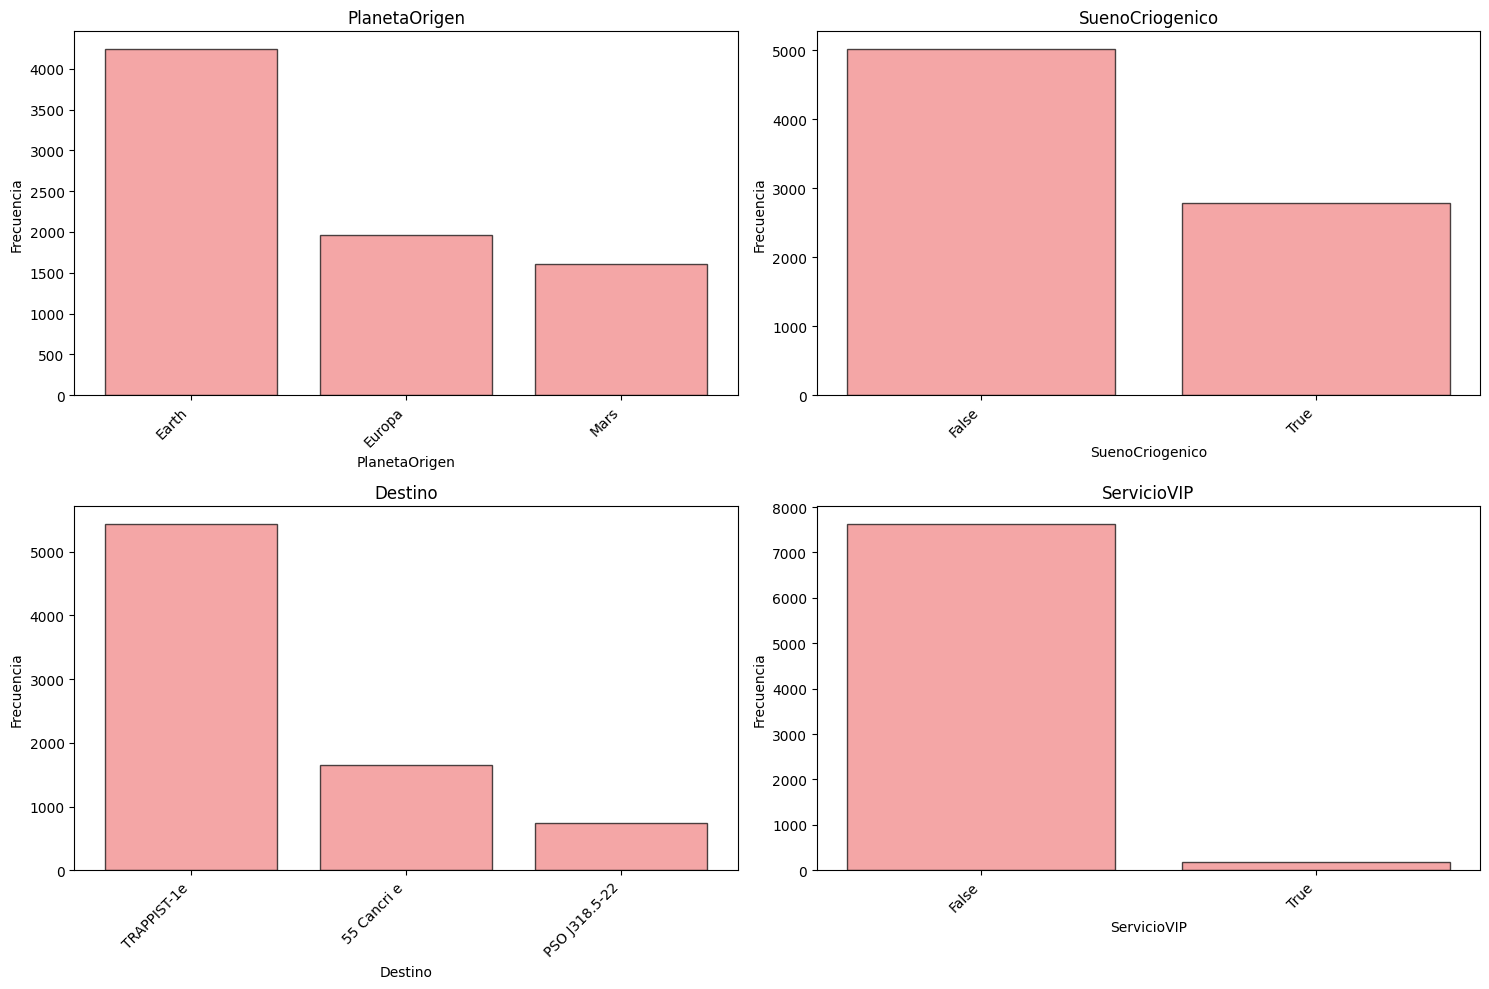

In [51]:
# Variables categóricas
categorical_cols = ['PlanetaOrigen', 'SuenoCriogenico', 'Destino', 'ServicioVIP']
categorical_cols = [col for col in categorical_cols if col in df.columns]

n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() if len(categorical_cols) > 1 else [axes]

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        value_counts = df[col].value_counts()
        axes[idx].bar(range(len(value_counts)), value_counts.values, color='lightcoral', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')

for idx in range(len(categorical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


## 1.5 Correlación entre Variables Numéricas


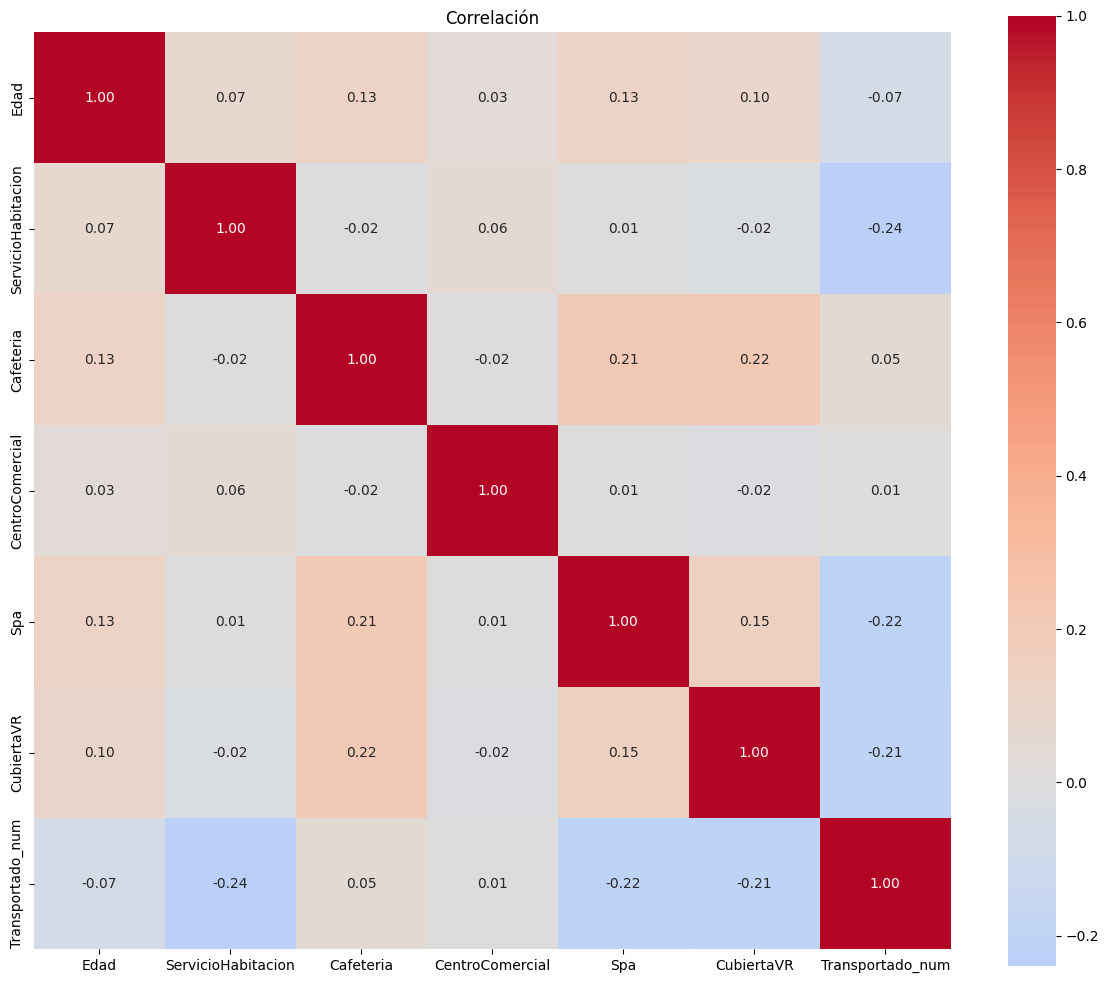

Correlación con Transportado:
Cafeteria             0.051358
CentroComercial       0.010145
Edad                 -0.073805
CubiertaVR           -0.205830
Spa                  -0.222618
ServicioHabitacion   -0.238996
Name: Transportado_num, dtype: float64


In [52]:
# Correlación
df_corr = df.copy()
df_corr['Transportado_num'] = df_corr['Transportado'].map({True: 1, False: 0})

numeric_cols_corr = df_corr.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_corr = [col for col in numeric_cols_corr if 'Id' not in col]

correlation_matrix = df_corr[numeric_cols_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlación')
plt.tight_layout()
plt.show()

target_corr = correlation_matrix['Transportado_num'].drop('Transportado_num').sort_values(ascending=False)
print("Correlación con Transportado:")
print(target_corr)


## 1.6 Relación entre Variables y el Target


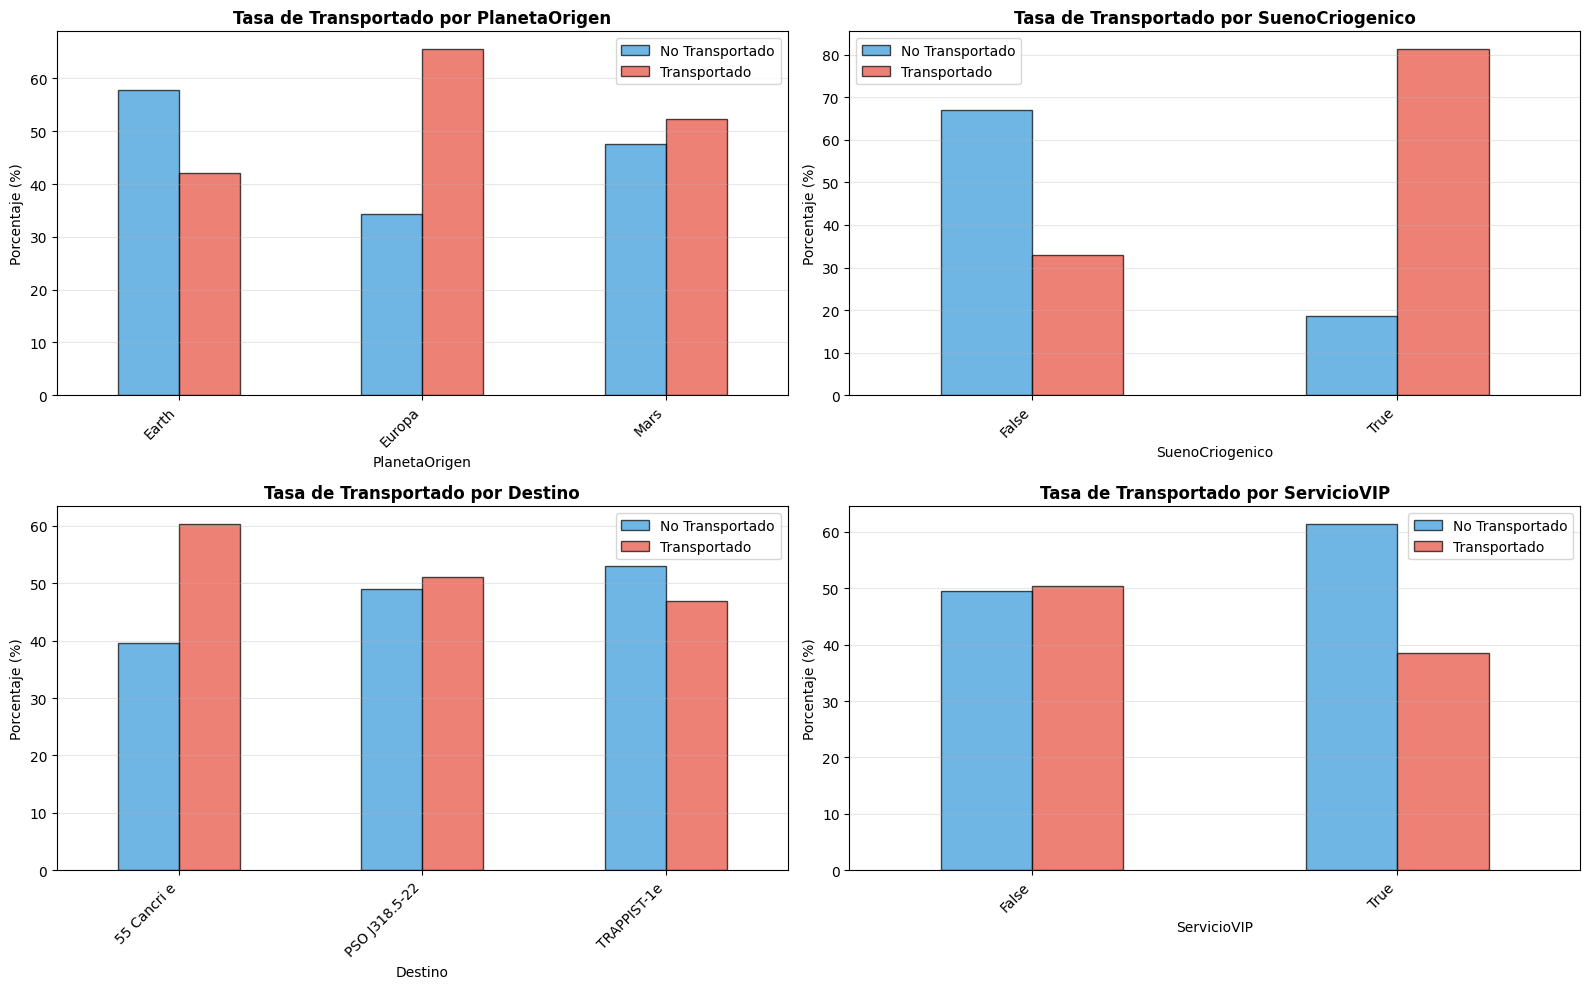

In [53]:
# Relación entre variables categóricas y el target
categorical_for_analysis = ['PlanetaOrigen', 'SuenoCriogenico', 'Destino', 'ServicioVIP']
categorical_for_analysis = [col for col in categorical_for_analysis if col in df.columns]

n_cols = 2
n_rows = (len(categorical_for_analysis) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten() if len(categorical_for_analysis) > 1 else [axes]

for idx, col in enumerate(categorical_for_analysis):
    if idx < len(axes):
        # Crear tabla cruzada normalizada
        ct = pd.crosstab(df[col], df['Transportado'], normalize='index') * 100
        ct.plot(kind='bar', ax=axes[idx], color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
        axes[idx].set_title(f'Tasa de Transportado por {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Porcentaje (%)')
        axes[idx].legend(['No Transportado', 'Transportado'], loc='best')
        axes[idx].grid(axis='y', alpha=0.3)
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')

# Ocultar ejes vacíos
for idx in range(len(categorical_for_analysis), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


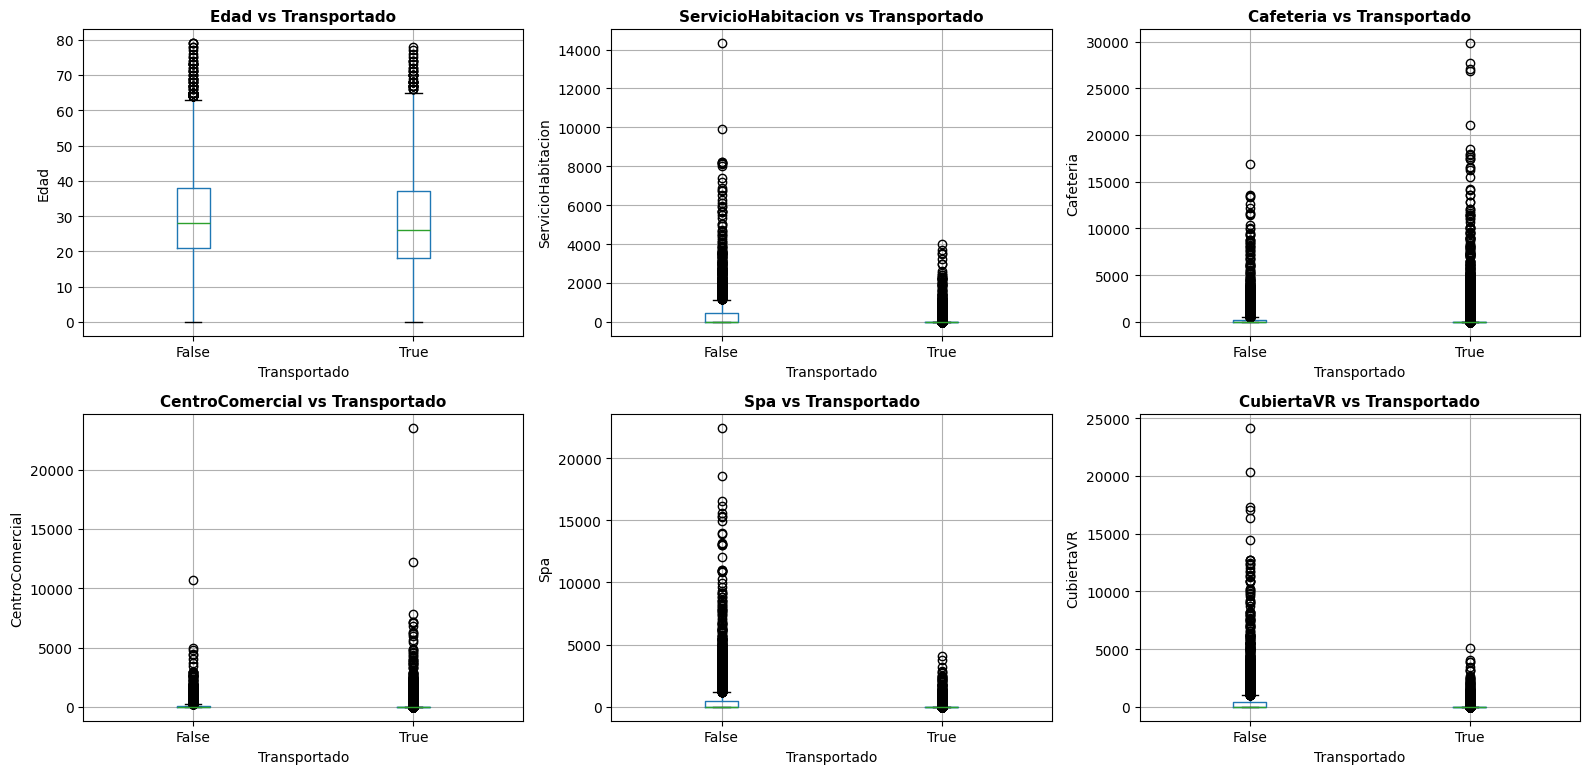

In [54]:
# Boxplots de variables numéricas vs Transportado (para las más importantes)
# Seleccionar variables numéricas relevantes (excluir ID)
numeric_for_boxplot = [col for col in numeric_cols[:6] if col in df.columns]  # Tomar las primeras 6

n_cols = 3
n_rows = (len(numeric_for_boxplot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() if len(numeric_for_boxplot) > 1 else [axes]

for idx, col in enumerate(numeric_for_boxplot):
    if idx < len(axes):
        df_plot = df[[col, 'Transportado']].dropna()
        df_plot.boxplot(column=col, by='Transportado', ax=axes[idx])
        axes[idx].set_title(f'{col} vs Transportado', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Transportado')
        axes[idx].set_ylabel(col)
        plt.sca(axes[idx])
        plt.xticks([1, 2], ['False', 'True'])

# Ocultar ejes vacíos
for idx in range(len(numeric_for_boxplot), len(axes)):
    axes[idx].axis('off')

plt.suptitle('')  # Remover el título automático de pandas
plt.tight_layout()
plt.show()


## 1.7 Hallazgos Clave del Análisis Exploratorio


In [55]:
# Resumen EDA
print(f"Registros: {len(df):,} | Variables: {len(df.columns)}")
print(f"Target balanceado: {df['Transportado'].value_counts(normalize=True).min():.1%}")

if 'Transportado_num' in df_corr.columns:
    top_corr = correlation_matrix['Transportado_num'].drop('Transportado_num').abs().sort_values(ascending=False).head(3)
    print("\nTop 3 variables:")
    for var, corr_val in top_corr.items():
        print(f"  {var}: {corr_val:.3f}")

if 'SuenoCriogenico' in df.columns:
    cryo_transport = df.groupby('SuenoCriogenico')['Transportado'].value_counts(normalize=True).unstack() * 100
    if True in cryo_transport.index and True in cryo_transport.columns:
        cryo_effect = cryo_transport.loc[True, True] - cryo_transport.loc[False, True]
        print(f"\nSueño criogénico aumenta transporte en {cryo_effect:+.1f}%")


Registros: 8,000 | Variables: 14
Target balanceado: 49.8%

Top 3 variables:
  ServicioHabitacion: 0.239
  Spa: 0.223
  CubiertaVR: 0.206

Sueño criogénico aumenta transporte en +48.5%


# Paso 2: Limpieza de Datos e Ingeniería de Características

### 2.1 Setup y normalización de tipos

In [56]:

# Normalizar booleanos
bool_maps = {True: True, False: False, 'True': True, 'False': False, 'TRUE': True, 'FALSE': False, 1: True, 0: False}
for col in ['SuenoCriogenico', 'ServicioVIP', 'Transportado']:
    if col in df.columns:
        df[col] = df[col].map(bool_maps).astype('boolean')


### 2.2 Parseo de Cabina → Deck/Num/Side

In [57]:

# Parsear Cabina
if 'Cabina' in df.columns:
    parts = df['Cabina'].astype('string').str.split('/', expand=True)
    if parts.shape[1] >= 1:
        df['Deck'] = parts[0]
    if parts.shape[1] >= 2:
        df['CabinaNum'] = pd.to_numeric(parts[1], errors='coerce')
    if parts.shape[1] >= 3:
        df['Side'] = parts[2]


### 2.3 Imputación de gastos y TotalSpend

In [58]:

# Gastos
gasto_cols = [c for c in ['ServicioHabitacion','Cafeteria','CentroComercial','Spa','CubiertaVR'] if c in df.columns]
for c in gasto_cols:
    df[c] = df[c].fillna(0)

df['TotalSpend'] = df[gasto_cols].sum(axis=1) if gasto_cols else 0


### 2.4 Regla de negocio: CryoSleep ⇒ gastos = 0

In [59]:

# CryoSleep => gastos = 0
if 'SuenoCriogenico' in df.columns and len(gasto_cols):
    mask = df['SuenoCriogenico'] == True
    df.loc[mask, gasto_cols] = 0
    df.loc[mask, 'TotalSpend'] = 0


### 2.5 Imputación de SuenoCriogenico por TotalSpend + moda

In [75]:

# Imputar SuenoCriogenico
if 'SuenoCriogenico' in df.columns:
    na = df['SuenoCriogenico'].isna()
    df.loc[na & (df['TotalSpend'] == 0), 'SuenoCriogenico'] = True
    df.loc[na & (df['TotalSpend'] > 0), 'SuenoCriogenico'] = False
    if df['SuenoCriogenico'].isna().any():
        moda = df['SuenoCriogenico'].mode(dropna=True)
        if len(moda):
            df['SuenoCriogenico'] = df['SuenoCriogenico'].fillna(moda.iloc[0])


### 2.6 Crear SpendZero

In [61]:

df['SpendZero'] = (df['TotalSpend'] == 0)


### 2.7 Imputación de Deck/Side y CabinaNum

In [62]:

# Imputar Deck/Side/CabinaNum
for col, fill in [('Deck','Unknown'), ('Side','Unknown')]:
    if col in df.columns:
        df[col] = df[col].fillna(fill)
if 'CabinaNum' in df.columns and 'Deck' in df.columns:
    df['CabinaNum'] = df.groupby('Deck')['CabinaNum'].transform(lambda s: s.fillna(s.median()))


c:\Users\santi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


### 2.8 Imputación de PlanetaOrigen/Destino por (Deck, Side) + fallback

In [63]:

# Imputar PlanetaOrigen/Destino
def fill_with_group_mode(df_, target, group_cols):
    if not all(c in df_.columns for c in group_cols) or target not in df_.columns:
        return df_[target]
    s = df_[target].copy()
    na_idx = s.isna()
    if na_idx.any():
        modes = df_.groupby(group_cols)[target].agg(lambda x: x.mode().iloc[0] if len(x.mode()) else np.nan)
        s.loc[na_idx] = df_.loc[na_idx, group_cols].merge(modes.reset_index(), on=group_cols, how='left')[target].values
    return s

for cat in ['PlanetaOrigen','Destino']:
    if cat in df.columns:
        df[cat] = fill_with_group_mode(df, cat, [c for c in ['Deck','Side'] if c in df.columns])
        if df[cat].isna().any():
            df[cat] = df[cat].fillna(df[cat].mode(dropna=True).iloc[0])


### 2.9 Imputación de ServicioVIP

In [64]:

# ServicioVIP
if 'ServicioVIP' in df.columns and df['ServicioVIP'].isna().any():
    moda_vip = df['ServicioVIP'].mode(dropna=True)
    df['ServicioVIP'] = df['ServicioVIP'].fillna(False if len(moda_vip)==0 else moda_vip.iloc[0])


### 2.10 Imputación de Edad

In [65]:

# Edad
if 'Edad' in df.columns:
    if all(c in df.columns for c in ['PlanetaOrigen','Destino']):
        df['Edad'] = df.groupby(['PlanetaOrigen','Destino'])['Edad'].transform(lambda s: s.fillna(s.median()))
    if df['Edad'].isna().any():
        df['Edad'] = df['Edad'].fillna(df['Edad'].median())


### 2.11 Features derivados (EdadBin, IsMinor, Deck_Side)

In [66]:

# Features derivados
if 'Edad' in df.columns:
    bins = [ -1, 12, 18, 25, 40, 60, 120 ]
    labels = ['niñez','adolescencia','joven','adulto','maduro','senior']
    df['EdadBin'] = pd.cut(df['Edad'], bins=bins, labels=labels)
    df['IsMinor'] = df['Edad'] < 18
if all(c in df.columns for c in ['Deck','Side']):
    df['Deck_Side'] = df['Deck'].astype(str) + '_' + df['Side'].astype(str)


### 2.12 Eliminación de columnas poco informativas

In [67]:

# Eliminar columnas innecesarias
drop_cols = [c for c in ['IdPasajero','Iniciales','Cabina','Transportado_num'] if c in df.columns]
df.drop(columns=drop_cols, inplace=True)


# Paso 3: Pre-procesamiento de Datos para el Modelo

### 3.1 Separar features (X) y target (y)

In [68]:

# Separar X e y
y = df['Transportado'].astype(int)
X = df.drop(columns=['Transportado'])


### 3.2 Identificar variables categóricas y numéricas

In [69]:

# Identificar tipos
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()


### 3.3 One-Hot Encoding para variables categóricas

In [91]:

from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding
if len(cat_cols) > 0:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
    X_cat_encoded = encoder.fit_transform(X[cat_cols])
    X_cat_encoded = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out(cat_cols), index=X.index)
else:
    X_cat_encoded = pd.DataFrame(index=X.index)


### 3.4 StandardScaler para variables numéricas

In [71]:

from sklearn.preprocessing import StandardScaler

# StandardScaler
if len(num_cols) > 0:
    scaler = StandardScaler()
    X_num_scaled = scaler.fit_transform(X[num_cols])
    X_num_scaled = pd.DataFrame(X_num_scaled, columns=num_cols, index=X.index)
else:
    X_num_scaled = pd.DataFrame(index=X.index)


### 3.5 Combinar features preprocesados

In [89]:

# Combinar
X_processed = pd.concat([X_cat_encoded, X_num_scaled], axis=1)
print(f'Procesado: {X_processed.shape}')


Procesado: (8000, 33)


In [90]:
# Verificar y eliminar NaN
print(f'NaN antes: {X_processed.isnull().sum().sum()}')
X_processed = X_processed.fillna(0)
print(f'NaN después: {X_processed.isnull().sum().sum()}')


NaN antes: 179
NaN después: 0


# Paso 4: Entrenamiento y Evaluación del Modelo

### 4.1 Dividir datos en conjuntos de entrenamiento, prueba y validación

In [78]:

from sklearn.model_selection import train_test_split

# Split: 60% train, 20% val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f'Train: {X_train.shape[0]} | Val: {X_val.shape[0]} | Test: {X_test.shape[0]}')


Train: 4800 | Val: 1600 | Test: 1600


### 4.2 Selección y justificación del modelo

### Random Forest
**Ventajas:**
- Captura relaciones NO lineales
- Maneja bien datos con correlaciones bajas (como el nuestro)
- Proporciona importancia de características
- Robusto ante valores atípicos

**Desventajas:**
- Menos interpretable que Regresión Logística
- Puede overfitting en datasets pequeños

#### Regresión Logística  
**Ventajas:**
- Modelo baseline rápido y interpretable
- Probabilidades calibradas
- Excelente como comparación

**Desventajas:**
- Asume relaciones lineales
- Podría subperformar con relaciones complejas

**Decisión:** Entrenar ambos y elegir el que mejor Accuracy tenga en validación.


### 4.3 Entrenar los modelos

In [79]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Entrenar modelos
lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15)
rf_model.fit(X_train, y_train)

print('Modelos entrenados')


Modelos entrenados


### 4.4 Evaluar en conjunto de validación

In [80]:

# Evaluar en validación
y_val_pred_lr = lr_model.predict(X_val)
y_val_pred_rf = rf_model.predict(X_val)

acc_lr = accuracy_score(y_val, y_val_pred_lr)
acc_rf = accuracy_score(y_val, y_val_pred_rf)

print(f'LR: {acc_lr:.4f} | RF: {acc_rf:.4f}')

mejor_modelo = rf_model if acc_rf > acc_lr else lr_model
mejor_nombre = 'RF' if acc_rf > acc_lr else 'LR'
print(f'Mejor: {mejor_nombre}')


LR: 0.7750 | RF: 0.7963
Mejor: RF


### 4.5 Evaluación final en conjunto de prueba

Accuracy test: 0.8031


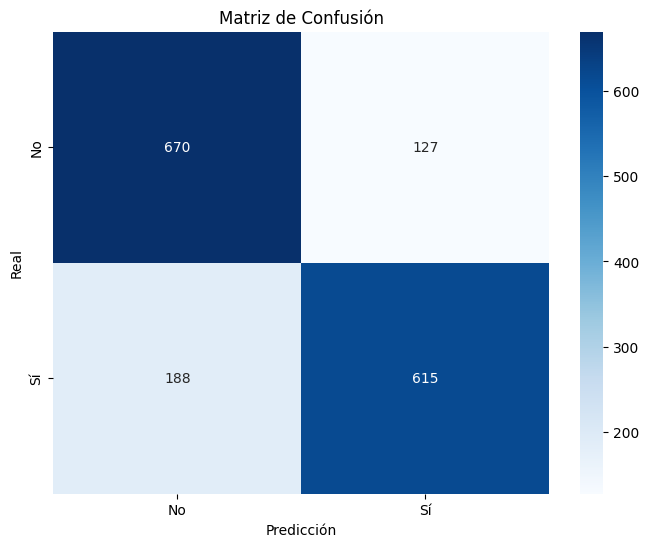

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       797
           1       0.83      0.77      0.80       803

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



In [81]:

from sklearn.metrics import confusion_matrix, classification_report

# Evaluación final
y_test_pred = mejor_modelo.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

print(f'Accuracy test: {acc_test:.4f}')

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

print(classification_report(y_test, y_test_pred))


### 4.6 Interpretación de resultados

In [82]:

# Feature importance (si es RF)
if hasattr(mejor_modelo, 'feature_importances_'):
    importances = mejor_modelo.feature_importances_
    indices = np.argsort(importances)[-5:][::-1]
    print('\nTop 5 features:')
    for i, idx in enumerate(indices, 1):
        print(f'{i}. {X_processed.columns[idx]}: {importances[idx]:.3f}')



Top 5 features:
1. TotalSpend: 0.161
2. CabinaNum: 0.120
3. Spa: 0.096
4. CubiertaVR: 0.095
5. ServicioHabitacion: 0.090


# Paso 5: Generación del Archivo de Entrega

### 5.1 Cargar datos para predicción

In [92]:

# Cargar datos evaluación
datos_prediccion = pd.read_csv('registros_evaluacion-2.csv')
print(f'Cargados: {datos_prediccion.shape}')


Cargados: (693, 13)


### 5.2 Aplicar limpieza y pre-procesamiento idéntico al entrenamiento

In [93]:

# APLICAR EXACTAMENTE LA MISMA LIMPIEZA QUE EN ENTRENAMIENTO

df_pred = datos_prediccion.copy()
id_pasajero = df_pred['IdPasajero'].copy()

# Normalizar booleanos
bool_maps = {True: True, False: False, 'True': True, 'False': False, 'TRUE': True, 'FALSE': False, 1: True, 0: False}
for col in ['SuenoCriogenico', 'ServicioVIP']:
    if col in df_pred.columns:
        df_pred[col] = df_pred[col].map(bool_maps).astype('boolean')

# Parsear Cabina
if 'Cabina' in df_pred.columns:
    parts = df_pred['Cabina'].astype('string').str.split('/', expand=True)
    if parts.shape[1] >= 1:
        df_pred['Deck'] = parts[0]
    if parts.shape[1] >= 2:
        df_pred['CabinaNum'] = pd.to_numeric(parts[1], errors='coerce')
    if parts.shape[1] >= 3:
        df_pred['Side'] = parts[2]

# Gastos
gasto_cols = [c for c in ['ServicioHabitacion','Cafeteria','CentroComercial','Spa','CubiertaVR'] if c in df_pred.columns]
for c in gasto_cols:
    df_pred[c] = df_pred[c].fillna(0)
df_pred['TotalSpend'] = df_pred[gasto_cols].sum(axis=1) if gasto_cols else 0

# CryoSleep => gastos = 0
if 'SuenoCriogenico' in df_pred.columns and len(gasto_cols):
    mask = df_pred['SuenoCriogenico'] == True
    df_pred.loc[mask, gasto_cols] = 0
    df_pred.loc[mask, 'TotalSpend'] = 0

# Imputar SuenoCriogenico
if 'SuenoCriogenico' in df_pred.columns:
    na = df_pred['SuenoCriogenico'].isna()
    df_pred.loc[na & (df_pred['TotalSpend'] == 0), 'SuenoCriogenico'] = True
    df_pred.loc[na & (df_pred['TotalSpend'] > 0), 'SuenoCriogenico'] = False
    if df_pred['SuenoCriogenico'].isna().any():
        moda = df_pred['SuenoCriogenico'].mode(dropna=True)
        if len(moda):
            df_pred['SuenoCriogenico'] = df_pred['SuenoCriogenico'].fillna(moda.iloc[0])

df_pred['SpendZero'] = (df_pred['TotalSpend'] == 0)

# Imputar Deck/Side/CabinaNum
for col, fill in [('Deck','Unknown'), ('Side','Unknown')]:
    if col in df_pred.columns:
        df_pred[col] = df_pred[col].fillna(fill)
if 'CabinaNum' in df_pred.columns and 'Deck' in df_pred.columns:
    df_pred['CabinaNum'] = df_pred.groupby('Deck')['CabinaNum'].transform(lambda s: s.fillna(s.median()))

# Imputar PlanetaOrigen/Destino
def fill_with_group_mode(df_, target, group_cols):
    if not all(c in df_.columns for c in group_cols) or target not in df_.columns:
        return df_[target]
    s = df_[target].copy()
    na_idx = s.isna()
    if na_idx.any():
        modes = df_.groupby(group_cols)[target].agg(lambda x: x.mode().iloc[0] if len(x.mode()) else np.nan)
        s.loc[na_idx] = df_.loc[na_idx, group_cols].merge(modes.reset_index(), on=group_cols, how='left')[target].values
    return s

for cat in ['PlanetaOrigen','Destino']:
    if cat in df_pred.columns:
        df_pred[cat] = fill_with_group_mode(df_pred, cat, [c for c in ['Deck','Side'] if c in df_pred.columns])
        if df_pred[cat].isna().any():
            df_pred[cat] = df_pred[cat].fillna(df_pred[cat].mode(dropna=True).iloc[0])

# ServicioVIP
if 'ServicioVIP' in df_pred.columns and df_pred['ServicioVIP'].isna().any():
    moda_vip = df_pred['ServicioVIP'].mode(dropna=True)
    df_pred['ServicioVIP'] = df_pred['ServicioVIP'].fillna(False if len(moda_vip)==0 else moda_vip.iloc[0])

# Edad
if 'Edad' in df_pred.columns:
    if all(c in df_pred.columns for c in ['PlanetaOrigen','Destino']):
        df_pred['Edad'] = df_pred.groupby(['PlanetaOrigen','Destino'])['Edad'].transform(lambda s: s.fillna(s.median()))
    if df_pred['Edad'].isna().any():
        df_pred['Edad'] = df_pred['Edad'].fillna(df_pred['Edad'].median())

# Features derivados
if 'Edad' in df_pred.columns:
    bins = [ -1, 12, 18, 25, 40, 60, 120 ]
    labels = ['niñez','adolescencia','joven','adulto','maduro','senior']
    df_pred['EdadBin'] = pd.cut(df_pred['Edad'], bins=bins, labels=labels)
    df_pred['IsMinor'] = df_pred['Edad'] < 18
if all(c in df_pred.columns for c in ['Deck','Side']):
    df_pred['Deck_Side'] = df_pred['Deck'].astype(str) + '_' + df_pred['Side'].astype(str)

# Eliminar columnas
drop_cols = [c for c in ['IdPasajero','Iniciales','Cabina'] if c in df_pred.columns]
df_pred.drop(columns=drop_cols, inplace=True)

print(f'Limpieza completa: {df_pred.shape}')


Limpieza completa: (693, 18)


c:\Users\santi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


### 5.3 Encoding y Scaling (usando transformers del entrenamiento)

In [94]:

# Encoding - usar encoder del entrenamiento
cat_cols_pred = df_pred.select_dtypes(include=['object', 'category']).columns.tolist()

if len(cat_cols_pred) > 0:
    X_cat_encoded_pred = encoder.transform(df_pred[cat_cols_pred])
    X_cat_encoded_pred = pd.DataFrame(X_cat_encoded_pred, 
                                      columns=encoder.get_feature_names_out(cat_cols_pred), 
                                      index=df_pred.index)
else:
    X_cat_encoded_pred = pd.DataFrame(index=df_pred.index)

# Scaling - usar scaler del entrenamiento
num_cols_pred = df_pred.select_dtypes(include=['number']).columns.tolist()

if len(num_cols_pred) > 0:
    X_num_scaled_pred = scaler.transform(df_pred[num_cols_pred])
    X_num_scaled_pred = pd.DataFrame(X_num_scaled_pred, columns=num_cols_pred, index=df_pred.index)
else:
    X_num_scaled_pred = pd.DataFrame(index=df_pred.index)


### 5.4 Combinar y ajustar

In [95]:

# Combinar
X_processed_pred = pd.concat([X_cat_encoded_pred, X_num_scaled_pred], axis=1)

# Ajustar columnas para que coincidan EXACTAMENTE con entrenamiento
missing_cols = set(X_processed.columns) - set(X_processed_pred.columns)
for col in missing_cols:
    X_processed_pred[col] = 0

# Reordenar columnas en el mismo orden que entrenamiento
X_processed_pred = X_processed_pred[X_processed.columns]

# Eliminar cualquier NaN
X_processed_pred = X_processed_pred.fillna(0)

print(f'Forma final: {X_processed_pred.shape} (debe ser (693, {X_processed.shape[1]}))')


Forma final: (693, 33) (debe ser (693, 33))


### 5.5 Realizar predicciones

In [96]:

# Predicciones
y_predicciones = mejor_modelo.predict(X_processed_pred)
print(f'Predicciones: {len(y_predicciones)}')


Predicciones: 693


### 5.6 Crear y guardar archivo

In [97]:

# Crear entrega
entrega = pd.DataFrame({
    'IdPasajero': id_pasajero,
    'Transportado': y_predicciones
})
print(f'Archivo: {entrega.shape}')


Archivo: (693, 2)


In [98]:

# Guardar
entrega.to_csv('predicciones_transportado.csv', index=False)
print('Guardado: predicciones_transportado.csv')


Guardado: predicciones_transportado.csv
